# ※ 필요한 패키지 및 데이터 불러오기

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('output/Busan.csv', encoding = 'cp949')

<hr>

# Preprocessing
#### Period
- 2022-05-06

#### Index
0. 전처리 전

1. Column : hour
2. Column : lightning
3. Column : condtion
4. Column : month
5. 전처리 후

# 0. 전처리 전

In [18]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,14.700000,-1.0,61.0,53.0,390.0,1.0,6.0,2010,중앙동
1,1,100.0,0.0,15.400000,-1.0,56.0,53.0,390.0,3.0,6.0,2010,중앙동
2,1,200.0,0.0,16.000000,-1.0,51.0,53.0,390.0,3.0,6.0,2010,중앙동
3,1,300.0,0.0,16.600000,-1.0,52.0,53.0,390.0,2.0,6.0,2010,중앙동
4,1,400.0,0.0,17.700001,-1.0,45.0,53.0,390.0,3.0,6.0,2010,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,1900.0,0.0,11.700000,NaN,63.0,2.5,359.0,NaN,4.0,2022,철마면
21411836,30,2000.0,0.0,11.400000,NaN,61.0,2.5,340.0,NaN,4.0,2022,철마면
21411837,30,2100.0,0.0,12.100000,NaN,56.0,1.1,345.0,NaN,4.0,2022,철마면
21411838,30,2200.0,0.0,14.300000,NaN,45.0,1.4,307.0,NaN,4.0,2022,철마면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [19]:
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [20]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,14.700000,-1.0,61.0,53.0,390.0,1.0,6.0,2010,중앙동
1,1,1,0.0,15.400000,-1.0,56.0,53.0,390.0,3.0,6.0,2010,중앙동
2,1,2,0.0,16.000000,-1.0,51.0,53.0,390.0,3.0,6.0,2010,중앙동
3,1,3,0.0,16.600000,-1.0,52.0,53.0,390.0,2.0,6.0,2010,중앙동
4,1,4,0.0,17.700001,-1.0,45.0,53.0,390.0,3.0,6.0,2010,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,NaN,63.0,2.5,359.0,NaN,4.0,2022,철마면
21411836,30,20,0.0,11.400000,NaN,61.0,2.5,340.0,NaN,4.0,2022,철마면
21411837,30,21,0.0,12.100000,NaN,56.0,1.1,345.0,NaN,4.0,2022,철마면
21411838,30,22,0.0,14.300000,NaN,45.0,1.4,307.0,NaN,4.0,2022,철마면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [21]:
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [22]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1.0,6.0,2010,중앙동
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3.0,6.0,2010,중앙동
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3.0,6.0,2010,중앙동
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2.0,6.0,2010,중앙동
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3.0,6.0,2010,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,NaN,4.0,2022,철마면
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,NaN,4.0,2022,철마면
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,NaN,4.0,2022,철마면
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,NaN,4.0,2022,철마면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [23]:
df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [24]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6.0,2010,중앙동
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6.0,2010,중앙동
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6.0,2010,중앙동
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6.0,2010,중앙동
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6.0,2010,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4.0,2022,철마면
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4.0,2022,철마면
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4.0,2022,철마면
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4.0,2022,철마면


## 4. Column : month
- 월을 정수형으로 표현

In [25]:
df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [26]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6,2010,중앙동
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6,2010,중앙동
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6,2010,중앙동
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6,2010,중앙동
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6,2010,중앙동
...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4,2022,철마면
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4,2022,철마면
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4,2022,철마면
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4,2022,철마면


## 5. Heat Index
- 열지수 : 기온과 습도에 따라 사람이 실제로 느끼는 더위를 지수화한 것
- ![](./img/HI.jpg)
    - 출처 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3801457/#r39
    - T is temperature in degrees F
    - RH is relative humidity in percent

##### 열 지수별 증상
|단계|지수 범위|설명|
|---|---|---|
|매우 높음|54이상|보통 사람이 열에 지속적으로 노출될 경우, 열사·일사병 위험이 매우 높음|
|높음|41 ~ 54 미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 일사병·열경련·일피폐 위험이 높음|
|보통|32 ~ 41미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 열사병·열경련·열피폐 가능성이 있음|
|낮음|32미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동시 피로 위험 높음|
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_04.jsp

In [27]:
df5 = df4[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\JW\AppData\Local\Temp\ipykernel_19940\2801911579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32
C:\Users\JW\AppData\Local\Temp\ipykernel_19940\2801911579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humi

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6,2010,중앙동,13.818333
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6,2010,중앙동,14.457778
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6,2010,중앙동,14.987222
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6,2010,중앙동,15.673333
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6,2010,중앙동,16.700557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4,2022,철마면,10.570556
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4,2022,철마면,10.188333
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4,2022,철마면,10.827778
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4,2022,철마면,12.960556


## 6. Discomfort Index
- 불쾌지수 
- 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)라고도 함
- 여름철 실내의 무더위의 기준으로서만 사용되고 있을 뿐, 복사나 바람 조건은 포함되어 있지 않기 때문에 그 적정한 사용에는 한계가 있다는 점에 유의
- 불쾌지수 값에 따라 불쾌감을 느끼는 정도도 개인에 따라 약간의 차이가 있음
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_05.jsp

##### 불쾌지수별 증상
|단계|지수 범위|설명|
|---|---|---|
|매우 높음|80이상|전원 불쾌감|
|높음|75~ 80 미만|50% 정도의 불쾌감|
|보통|68 ~ 75미만|불쾌감을 느낌|
|낮음68미만|전원 쾌적함|

In [28]:
df6 = df5[:]
df6['DI'] = df6['temp'] * 1.8 - ( 0.55 * ( 1 - df6['humidity'] / 100 ) * ( df6['temp'] * 1.8 - 26 )) + 32
df6

C:\Users\JW\AppData\Local\Temp\ipykernel_19940\37211246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['DI'] = df6['temp'] * 1.8 - ( 0.55 * ( 1 - df6['humidity'] / 100 ) * ( df6['temp'] * 1.8 - 26 )) + 32


,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6,2010,중앙동,13.818333,58.361330
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6,2010,중앙동,14.457778,59.303760
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6,2010,중앙동,14.987222,60.045400
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6,2010,중앙동,15.673333,60.855680
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6,2010,중앙동,16.700557,62.087351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4,2022,철마면,10.570556,54.065290
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4,2022,철마면,10.188333,53.695460
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4,2022,철마면,10.827778,54.801240
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4,2022,철마면,12.960556,57.818650


## 7. 전처리 후

In [29]:
df_final = df6
df_final

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6,2010,중앙동,13.818333,58.361330
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6,2010,중앙동,14.457778,59.303760
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6,2010,중앙동,14.987222,60.045400
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6,2010,중앙동,15.673333,60.855680
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6,2010,중앙동,16.700557,62.087351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4,2022,철마면,10.570556,54.065290
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4,2022,철마면,10.188333,53.695460
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4,2022,철마면,10.827778,54.801240
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4,2022,철마면,12.960556,57.818650


In [30]:
# 전처리된 데이터프레임을 저장한 뒤 이후에는 해당 파일을 불러서 사용
df_final.to_csv('output/Busan_pre.csv', index_label=False)

<hr><hr>

# 위 과정을 거친 파일이 있으면 바로 아래 EDA부터 진행

In [31]:
# 파일이 있으면 여기를 실행해서 아래의 EDA를 할 것
df_pre = pd.read_csv('output/Busan_pre.csv')

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

## 0. 기본적인 데이터 탐색
- made by SSJ

#### 1. year
요약
- 값이 없는 None이 없음
- 2010년부터 2022년까지 존재
- 2010년과 2022년은 모든 월이 있는게 아니므로 일수가 적음
- 윤년에 해당하는 날은 하루치인 296개의 데이터가 더 존재

In [32]:
df_pre['year'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


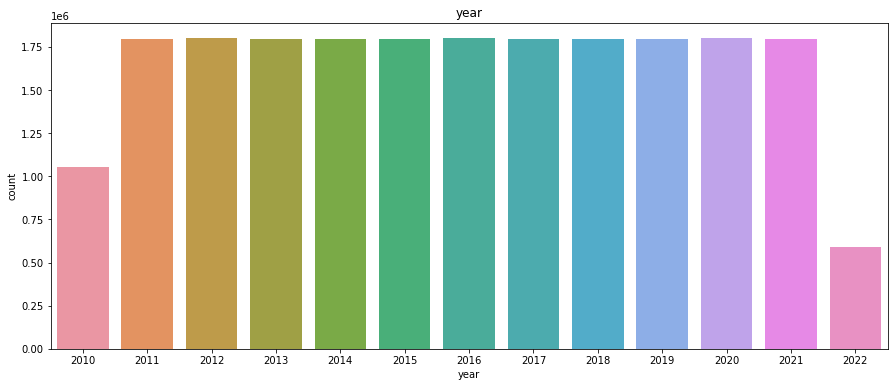

In [33]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['year'])
plt.title('year')
plt.show()

In [34]:
temp = []
for i in range(2010,2023):
    result = df_final[df_final['year'] == i].size
    print("{0:>4}년 :".format(i), "{0:>8}".format(result))
    temp.append(result)

2010년 : 14740320
2011년 : 25141200
2012년 : 25210080
2013년 : 25141200
2014년 : 25141200
2015년 : 25141200
2016년 : 25210080
2017년 : 25141200
2018년 : 25141200
2019년 : 25141200
2020년 : 25210080
2021년 : 25141200
2022년 :  8265600


#### 2. month
요약
- 2010년에는 6월부터 데이터가 존재
- 2022년에는 5월부터 데이터가 없음

In [35]:
def encode_sin_cos(df_,col_n,max_val):
    df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
    df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
    
    return df_

df_month = df_pre[['day','hour','month','year']]

data_month = encode_sin_cos(df_month,'month',12)
data_month = encode_sin_cos(df_month,'day',31)

C:\Users\JW\AppData\Local\Temp\ipykernel_19940\1351274675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
C:\Users\JW\AppData\Local\Temp\ipykernel_19940\1351274675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
C:\Users\JW\AppData\Local\Temp\ipykernel_19940\1351274675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

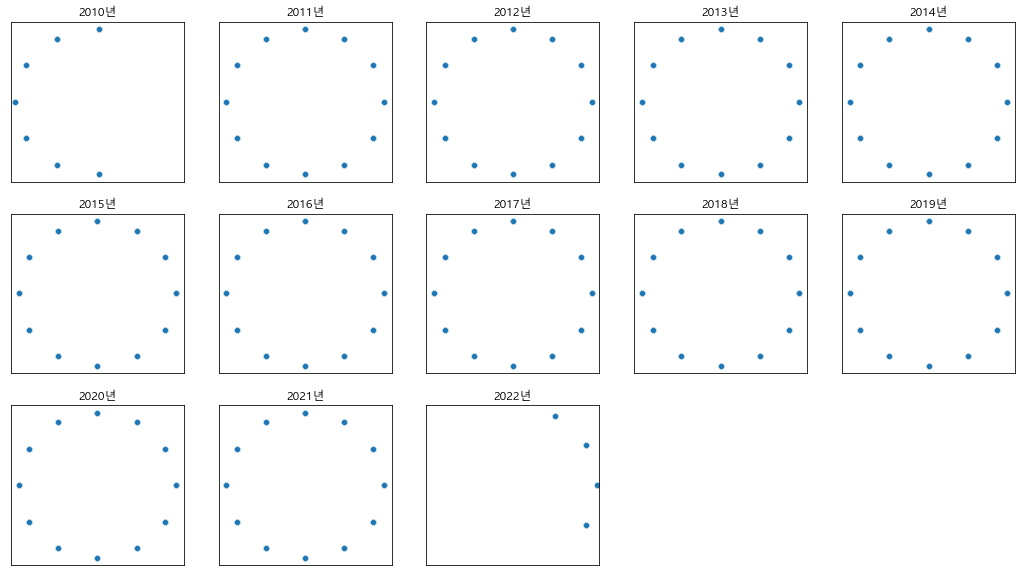

In [36]:
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

fig = plt.figure(figsize=(18,10))
plt.rc('font', family = 'Malgun Gothic')
for n,y in enumerate(year):
    ax = plt.subplot(3,5,n+1)
    sns.scatterplot(x="month_sin",y="month_cos",data=data_month[data_month['year'] == y])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(str(y)+"년")
    

#### 3. day
- 1일부터 28일까지 동일한 값이 나옴
- 29, 30, 31로 갈수록 count가 점점 줄어듦

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


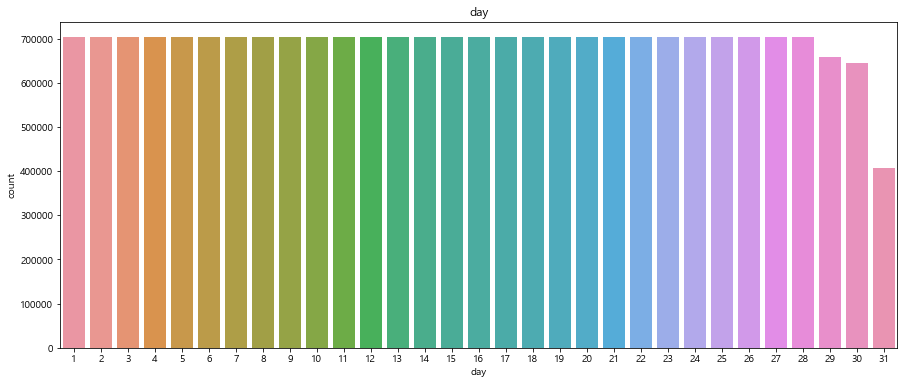

In [37]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['day'])
plt.title('day')
plt.show()

In [38]:
for i in range(1,32):
    result = df_final[df_final['day'] == i].size
    print("{0:>2}일".format(i), result, end='\t\t')
    if i % 4 == 0:
        print('')

 1일 9849840		 2일 9849840		 3일 9849840		 4일 9849840		
 5일 9849840		 6일 9849840		 7일 9849840		 8일 9849840		
 9일 9849840		10일 9849840		11일 9849840		12일 9849840		
13일 9849840		14일 9849840		15일 9849840		16일 9849840		
17일 9849840		18일 9849840		19일 9849840		20일 9849840		
21일 9849840		22일 9849840		23일 9849840		24일 9849840		
25일 9849840		26일 9849840		27일 9849840		28일 9849840		
29일 9229920		30일 9023280		31일 5717040		

#### 4. hour
- None 값이 포함되어 있지 않음
- 모든 시간에 대해 동일한 수의 데이터 존재

In [39]:
df_pre['hour'].isna().sum()

0

In [40]:
(df_pre['hour'] == 0).sum() == (df_pre['hour'] == 1).sum() == (df_pre['hour'] == 2).sum()\
    == (df_pre['hour'] == 3).sum() == (df_pre['hour'] == 4).sum() == (df_pre['hour'] == 5).sum()\
    == (df_pre['hour'] == 6).sum() == (df_pre['hour'] == 7).sum() == (df_pre['hour'] == 8).sum()\
    == (df_pre['hour'] == 9).sum() == (df_pre['hour'] == 10).sum() == (df_pre['hour'] == 11).sum()\
    == (df_pre['hour'] == 12).sum() == (df_pre['hour'] == 13).sum() == (df_pre['hour'] == 14).sum()\
    == (df_pre['hour'] == 15).sum() == (df_pre['hour'] == 16).sum() == (df_pre['hour'] == 17).sum()\
    == (df_pre['hour'] == 18).sum() == (df_pre['hour'] == 19).sum() == (df_pre['hour'] == 20).sum()\
    == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 23).sum()

True

#### 5.rainfall
- 강우량 데이터 (단위:mm)

In [41]:
print('결측치 수 : ',df_pre['rainfall'].isna().sum())
a = list(df_pre[df_pre['rainfall'] == -1].index)
print('미측정 수 : ',len(a))
a = list(df_pre[df_pre['rainfall'] == 0].index)
print('비가 오지 않은 날 : ',len(a))

결측치 수 :  0
미측정 수 :  35208
비가 오지 않은 날 :  20022583


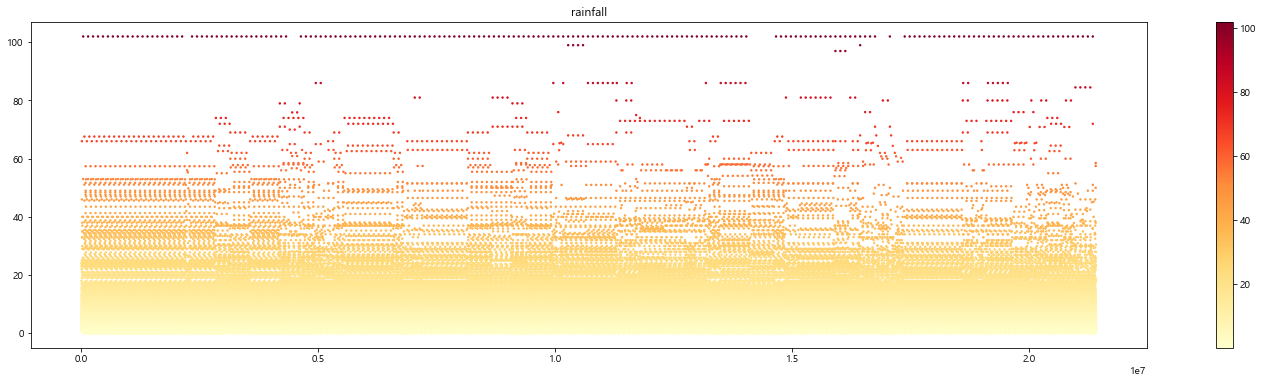

강우량의 0을 제외한 최소값 : 0.1 mm
강우량의 최댓값 : 102.0 mm


In [42]:
fig = plt.figure(figsize=(25,6))
temp = df_pre[(df_pre['rainfall'] != 0) & (df_pre['rainfall'] != -1)]['rainfall']
plt.scatter(temp.index, temp, s=2, c=temp, cmap='YlOrRd')
plt.colorbar()
plt.title('rainfall')
plt.show()
print('강우량의 0을 제외한 최소값 :',temp.min(),'mm')
print('강우량의 최댓값 :',temp.max(),'mm')

#### 5.1 rainfall preprocessing
- 앞, 뒤에서 측정한 경우
    - 앞, 뒤의 평균으로 강수량을 계산
- 연속적으로 측정하지 않은 경우
    - 바로 직전과 직후의 강우량이 0이라면 비가 오지 않았을 확률이 매우 높음 -> 0으로 변경
    - 바로 직전과 직후에 비가 왔다면 어떤식으로 데이터를 변경할지 고민해봐야함
        - 해당 경우는 없는 것으로 확인됨

In [43]:
# 강수량을 측정하지 않은 시간대의 index
a = list(df_pre[df_pre['rainfall'] == -1].index)

list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

5078


In [44]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [45]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'rainfall'] = (df_pre.loc[i-1,'rainfall'] + df_pre.loc[i+1,'rainfall']) / 2

In [46]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    # 직전, 직후가 0인 경우
    if (df_pre.loc[i[0]-1,'rainfall'] == 0) & (df_pre.loc[i[-1]+1,'rainfall'] == 0):
        for j in i:
            df_pre.loc[j,'rainfall'] = 0
    # 직전 또는 직후가 0이 아닌 경우
    else:
        print(i)

# 직전 또는 직후에 비가 온 case는 존재하지 않음

[4985480, 4985481]
[5089928, 5089929]
[9998984, 9998985]
[10103432, 10103433]
[10207880, 10207881]
[10730120, 10730121]
[10834568, 10834569]
[10939016, 10939017]
[11043464, 11043465]
[11147912, 11147913]
[11252360, 11252361]
[11369760, 11369761, 11369762, 11369763, 11369764]
[11470461, 11470462, 11470463, 11470464, 11470465, 11470466, 11470467, 11470468, 11470469, 11470470, 11470471, 11470472, 11470473, 11470474, 11470475, 11470476, 11470477, 11470478]
[11474208, 11474209, 11474210, 11474211, 11474212]
[11578656, 11578657, 11578658, 11578659, 11578660]
[11683104, 11683105, 11683106, 11683107, 11683108]
[11787552, 11787553, 11787554, 11787555, 11787556]
[12410493, 12410494, 12410495, 12410496, 12410497, 12410498, 12410499, 12410500, 12410501, 12410502, 12410503, 12410504, 12410505, 12410506, 12410507, 12410508, 12410509, 12410510]
[12414240, 12414241, 12414242, 12414243, 12414244]
[12514941, 12514942, 12514943, 12514944, 12514945, 12514946, 12514947, 12514948, 12514949, 12514950, 125149

In [47]:
# rainfall이 -1인 경우가 남아있는지 확인
(df_pre['rainfall'] == -1).sum()

302

<hr>

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

# 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

# 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

# 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

# 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

# 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

# 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by 

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by 

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by LEH
- Period : 2022-05-06

In [49]:
df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')
df_region

C:\Users\JW\AppData\Local\Temp\ipykernel_19940\2812696719.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/Daegu/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [50]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [51]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [52]:
df_pre

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,14.700000,-1,61.0,53.0,390.0,1,6,2010,중앙동,13.818333,58.361330
1,1,1,0.0,15.400000,-1,56.0,53.0,390.0,3,6,2010,중앙동,14.457778,59.303760
2,1,2,0.0,16.000000,-1,51.0,53.0,390.0,3,6,2010,중앙동,14.987222,60.045400
3,1,3,0.0,16.600000,-1,52.0,53.0,390.0,2,6,2010,중앙동,15.673333,60.855680
4,1,4,0.0,17.700001,-1,45.0,53.0,390.0,3,6,2010,중앙동,16.700557,62.087351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21411835,30,19,0.0,11.700000,-1,63.0,2.5,359.0,-1,4,2022,철마면,10.570556,54.065290
21411836,30,20,0.0,11.400000,-1,61.0,2.5,340.0,-1,4,2022,철마면,10.188333,53.695460
21411837,30,21,0.0,12.100000,-1,56.0,1.1,345.0,-1,4,2022,철마면,10.827778,54.801240
21411838,30,22,0.0,14.300000,-1,45.0,1.4,307.0,-1,4,2022,철마면,12.960556,57.818650


In [53]:
df_10 = df_pre.merge(df_region, on='region')

In [54]:
df_10

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI,region2
